In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set_context("talk")

In [2]:
cov = [[0.01, 0], [0, 0.01]]
mean_blue = [0.45, 0.55]
mean_orange = [0.6, 0.25]
n_samples = 1000

blue   = np.random.multivariate_normal(mean_blue, cov, n_samples)
orange = np.random.multivariate_normal(mean_orange, cov, n_samples)

In [3]:
data = pd.DataFrame([
    *[[x, y, "blue"]  for x, y in blue],
    *[[x, y, "orange"] for x, y in orange],
], columns=["x", "y", "color"])
data

,x,y,color
0,0.529770,0.570455,blue
1,0.371589,0.475657,blue
2,0.466960,0.604013,blue
3,0.386345,0.471583,blue
4,0.392370,0.420136,blue
...,...,...,...
1995,0.569278,0.454096,orange
1996,0.732030,0.354998,orange
1997,0.641214,0.162873,orange
1998,0.544581,0.348215,orange


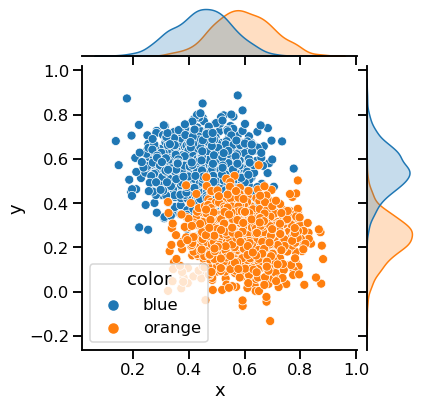

In [4]:
sns.jointplot(data=data, x='x', y='y', hue="color")

In [5]:
X = data[['x', 'y']]
y = data.color

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train.shape, y_test.shape

((1500,), (500,))

In [7]:
params = [{
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}, {
    'penalty': ['none']
}]

model = LogisticRegression()
clf = GridSearchCV(model,
                   param_grid=params,
                   cv=5,
                   refit=True,
                   verbose=1)
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'C': 0.1, 'penalty': 'l2'}

In [8]:
clf.best_estimator_.coef_, clf.best_estimator_.intercept_

(array([[ 2.40736785, -5.14788282]]), array([0.83056719]))

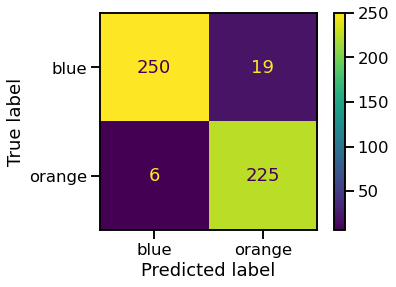

In [9]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

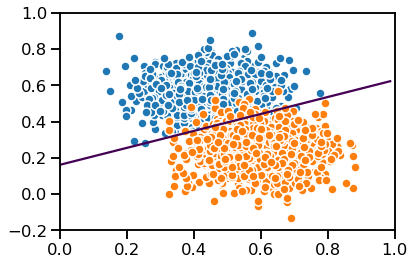

In [10]:
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)
grid = np.c_[xx1.ravel(), xx2.ravel()]
preds = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)

plt.rcParams["scatter.edgecolors"] = "white"

fig = plt.gca()
fig.set_xlim([0, 1])
fig.set_ylim([-0.2, 1])
fig.scatter(blue[:, 0], blue[:, 1])
fig.scatter(orange[:, 0], orange[:, 1])
fig.contour(xx1, xx2, preds, levels=[0.5])

In [11]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        blue       0.98      0.93      0.95       269
      orange       0.92      0.97      0.95       231

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

